Loading and Summarization of existing dataset [ to know the majority and minority class that could be used in oversampling or undersampling ]

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from pandas import set_option
from collections import Counter
# define the dataset location
filename = 'training.csv'
# load the csv file as a data frame
dataframe = read_csv(filename, header=None,engine=None)
# summarize the shape of the dataset
print(dataframe.shape)
# describe the dataset
set_option('precision', 3)
print(dataframe.describe())
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

(2053175, 43)
              3          4          5   ...         39         40         41
count  2.053e+06  2.053e+06  2.053e+06  ...  2.053e+06  2.053e+06  2.053e+06
mean   2.192e+03  6.603e+02  8.358e-04  ...  3.324e+02  1.719e-01  0.000e+00
std    1.045e+06  1.719e+04  2.890e-02  ...  2.123e+02  3.770e-01  0.000e+00
min    0.000e+00  0.000e+00  0.000e+00  ...  0.000e+00  0.000e+00  0.000e+00
25%    4.400e+01  0.000e+00  0.000e+00  ...  1.200e+02  0.000e+00  0.000e+00
50%    5.200e+02  0.000e+00  0.000e+00  ...  5.100e+02  0.000e+00  0.000e+00
75%    1.032e+03  0.000e+00  0.000e+00  ...  5.110e+02  0.000e+00  0.000e+00
max    1.168e+09  7.069e+06  1.000e+00  ...  5.110e+02  1.000e+00  0.000e+00

[8 rows x 39 columns]
Class=class10, Count=449447, Percentage=21.890%
Class=normal, Count=407746, Percentage=19.859%
Class=class18, Count=1176816, Percentage=57.317%
Class=class15, Count=4349, Percentage=0.212%
Class=class06, Count=5302, Percentage=0.258%
Class=class17, Count=6613, Percentag

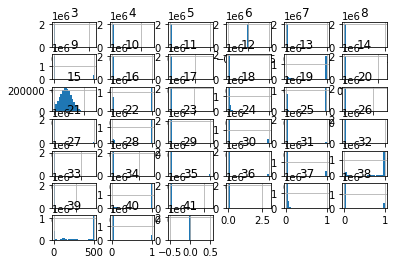

In [ ]:
from matplotlib import pyplot
# create a histogram plot of each variable
dataframe.hist(bins=25)
# show the plot
pyplot.show()

In [ ]:
# baseline model and test harness for the ecoli dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier

# load the dataset as a numpy array
data = read_csv('training.csv', header=None)
# retrieve numpy array
data = data.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [ ]:
print(data)

[['TCP' 'PRIVATE' 'STAT02' ... 0.0 0.0 'class10']
 ['TCP' 'HTTP' 'STAT10' ... 0.0 0.0 'normal']
 ['ICMP' 'ECR_I' 'STAT10' ... 0.0 0.0 'class18']
 ...
 ['TCP' 'HTTP' 'STAT10' ... 0.01 0.0 'normal']
 ['ICMP' 'ECR_I' 'STAT10' ... 0.0 0.0 'class18']
 ['TCP' 'PRIVATE' 'STAT06' ... nan nan nan]]


In [ ]:
print(y)

['class10' 'normal' 'class18' ... 'normal' 'class18' nan]


In [ ]:
y=y[:-1]

In [ ]:
print(y)

['class10' 'normal' 'class18' ... 'normal' 'normal' 'class18']


In [ ]:
	y = LabelEncoder().fit_transform(y)

In [ ]:
# baseline model and test harness for the ecoli dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier

# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable to have the classes 0 and 1  
	y = LabelEncoder().fit_transform(y)
	return X, y

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the location of the dataset
full_path = 'training.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='most_frequent')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

TypeError: ignored